# Fish Weight Prediction Using Random Forest Regression

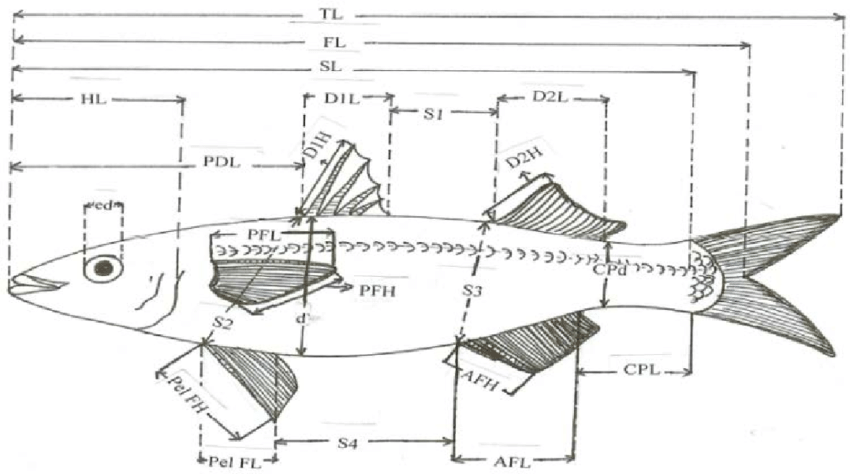

This is a model that predicts the weight of a fish given various features like Lengths, Height and Width. We will look at it all in a moment.

The dataset was downloaded from Kaggle and has the following as its features :

1. Species - The type of fish.
2. Weight of the fish in grams(g) - This will be our dependant variable or the predictand.
3. Length 1 is the Vertical Length of the fish in centimeters(cm).
4. Length 2 is the Diagonal Length of the fish in centimeters(cm).
5. Length 3 is the Cross Length of the fish in centimeters(cm).
6. Height of the fish in centimeters(cm).
7. Width of the fish in centimeters(cm).

When the dataset was downloaded, the lengths were named as Length 1, Length 2 and Length 3 but it has been renamed which we will  see later in the coding part.

Here, I will be implementing the Random Forest Regressor Model for making predictions


In [1]:
#First, let us import the libraries that are intially required for visualization and analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab 
%matplotlib inline

In [2]:
# Now, lets read in the dataset that we will be using and also check the first 5 values.
df = pd.read_csv('Fish.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


As mentioned earlier, the column names of Length1, Length2 and Length3 will have to be changed to get a better clarity of what lengths they are referring to. This helps us to understand the features of the fish much better.

In [4]:
df.rename(columns={'Weight':'Weight_in_grams','Length1':'Vertical_Length_in_cm','Length2':'Diagonal_Length_in_cm',
                  'Length3':'Cross_Length_in_cm','Height':'Height_in_cm','Width':'Diagonal_Width_in_cm'},inplace = True)

In [5]:
df.head()

,Species,Weight_in_grams,Vertical_Length_in_cm,Diagonal_Length_in_cm,Cross_Length_in_cm,Height_in_cm,Diagonal_Width_in_cm
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
#Now, lets check some info of our dataset as to how many columns and rows are present and also if there are any nulll values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                159 non-null    object 
 1   Weight_in_grams        159 non-null    float64
 2   Vertical_Length_in_cm  159 non-null    float64
 3   Diagonal_Length_in_cm  159 non-null    float64
 4   Cross_Length_in_cm     159 non-null    float64
 5   Height_in_cm           159 non-null    float64
 6   Diagonal_Width_in_cm   159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
#Now we will check the statistical summary of our dataset.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight_in_grams,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Vertical_Length_in_cm,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Diagonal_Length_in_cm,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Cross_Length_in_cm,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height_in_cm,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Diagonal_Width_in_cm,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [8]:
#Checking some information about the species
df['Species'].describe()

count       159
unique        7
top       Perch
freq         56
Name: Species, dtype: object

In [9]:
#It looks like the fish Perch is the one that is the most in our dataset
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [10]:
weight = df.groupby(['Species'])['Weight_in_grams']

In [11]:
weight.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Bream,35.0,617.828571,209.205709,242.0,462.50,610.00,717.00,1000.0
Parkki,11.0,154.818182,78.755086,55.0,105.00,145.00,185.00,300.0
Perch,56.0,382.239286,347.617717,5.9,120.00,207.50,692.50,1100.0
Pike,17.0,718.705882,494.140765,200.0,345.00,510.00,950.00,1650.0
Roach,20.0,152.050000,88.828916,0.0,104.25,147.50,171.75,390.0
Smelt,14.0,11.178571,4.131526,6.7,8.95,9.85,12.20,19.9
Whitefish,6.0,531.000000,309.602972,270.0,279.00,423.00,735.00,1000.0


In [12]:
#Checking the correlation of each independant variable with respect to the dependant variable and also visualizing it
df.corr()['Weight_in_grams']

Weight_in_grams          1.000000
Vertical_Length_in_cm    0.915712
Diagonal_Length_in_cm    0.918618
Cross_Length_in_cm       0.923044
Height_in_cm             0.724345
Diagonal_Width_in_cm     0.886507
Name: Weight_in_grams, dtype: float64

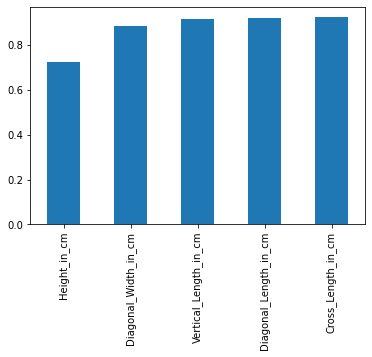

In [13]:
df.corr()['Weight_in_grams'].sort_values().drop('Weight_in_grams').plot(kind='bar')

# Data Visualization

In [14]:
sns.set_style('whitegrid')

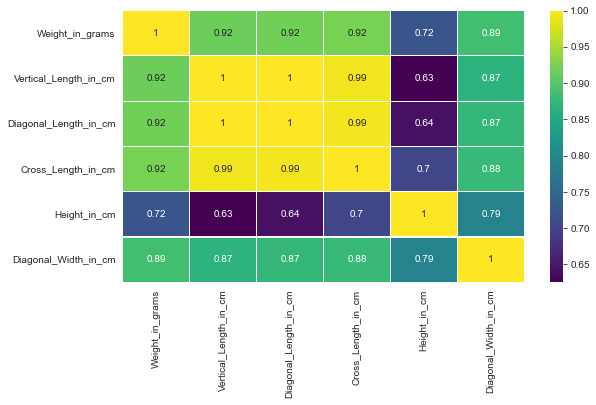

In [15]:
#Checking the correlation of all the columns to each other and also visualizing it using a heatmap
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap='viridis',annot=True,linewidths=0.01)

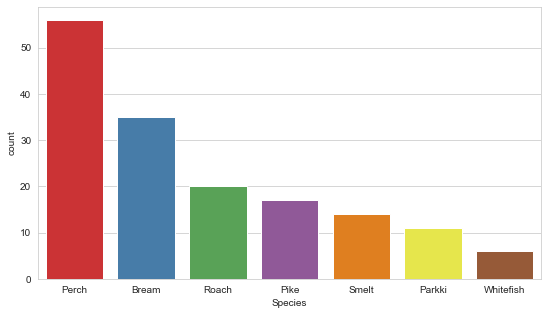

In [16]:
# Representing the number of each species of fish through seaborn's countplot
plt.figure(figsize=(9,5))
order_s = ['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish']
sns.countplot(x='Species',data=df,palette='Set1',order=order_s)

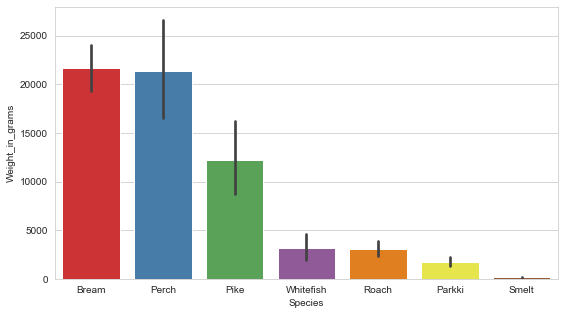

In [17]:
# Representing the total weight of each species of fish through seaborn's barplot
plt.figure(figsize=(9,5))
order_w = ['Bream','Perch','Pike','Whitefish','Roach','Parkki','Smelt']
sns.barplot(x='Species',y='Weight_in_grams',data=df,estimator=sum,palette='Set1',order=order_w)

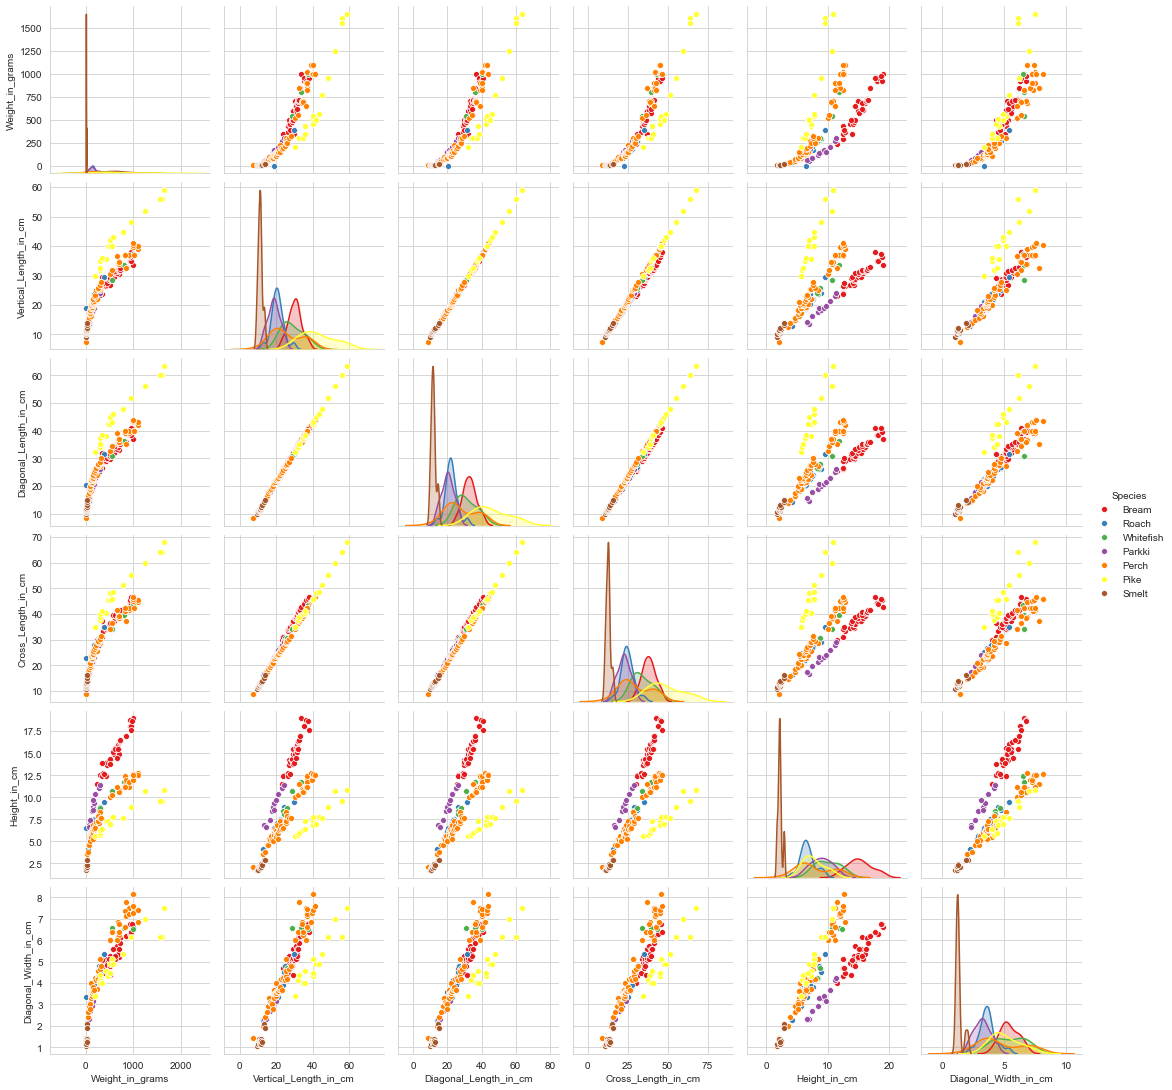

In [18]:
#Lets use seaborn's pairplot to check the pairwise relationship in the dataset with respect to Species.
sns.pairplot(df,hue='Species',palette='Set1')

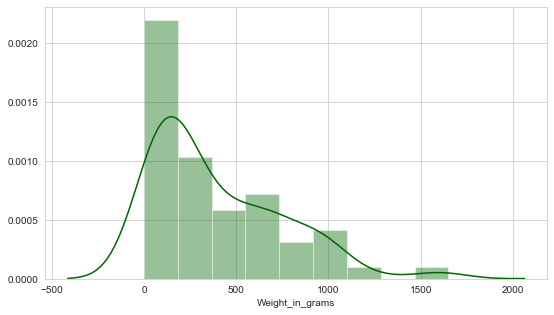

In [19]:
# Checking the distribution of weights of fish by using a distplot
plt.figure(figsize=(9,5))
sns.distplot(df['Weight_in_grams'],color='darkgreen')

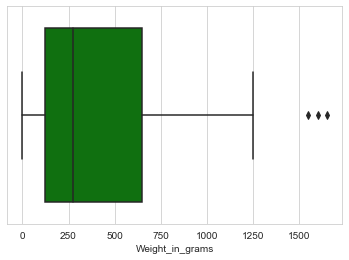

In [20]:
sns.boxplot(x=df['Weight_in_grams'],color='green')

In [21]:
#Detecting outliers and removing them
outlier = []
data = df['Weight_in_grams']
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outlier.append(i)
    return outlier

In [22]:
detect_outlier(data)

[1600.0, 1550.0, 1650.0]

In [23]:
# It looks like weight above 1500 grams seem to be an outlier. These can be removed from the dataset.
df[df['Weight_in_grams'] > 1500][['Species','Weight_in_grams']]

,Species,Weight_in_grams
142,Pike,1600.0
143,Pike,1550.0
144,Pike,1650.0


In [24]:
df.drop([142,143,144],inplace=True)

Next, let us create dummy variables for the Species column as the model does not take Strings as an input. Later, we will drop the Species column and join both the dummies dataframe and our original dataset.

In [25]:
Species = pd.get_dummies(df['Species'],drop_first=True)

In [26]:
new_df  = pd.concat([df,Species],axis=1)

In [27]:
new_df.head()

,Species,Weight_in_grams,Vertical_Length_in_cm,Diagonal_Length_in_cm,Cross_Length_in_cm,Height_in_cm,Diagonal_Width_in_cm,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [28]:
new_df.drop('Species',inplace=True,axis=1)

In [29]:
new_df.head()

,Weight_in_grams,Vertical_Length_in_cm,Diagonal_Length_in_cm,Cross_Length_in_cm,Height_in_cm,Diagonal_Width_in_cm,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


## Training and Splitting the model into Training and Test sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = new_df.drop('Weight_in_grams',axis=1) #independant variables
y = new_df['Weight_in_grams'] #dependant variable/predictand

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Scaling the values

##### Here, I will be using the Standard Scalar method to scale down the values. This method standardizes a feature by subtracting the mean and later scaling it to unit variance. Unit variance here means that dividing all the values by standard deviation.

In [33]:
#from sklearn.preprocessing import StandardScaler

In [34]:
#scaler = StandardScaler()

In [35]:
#X_train = scaler.fit_transform(X_train)

In [36]:
#X_test = scaler.transform(X_test)

In [37]:
#X_train.shape

# Building The Model

#### A Random Forest Regressor is an ensemble model wherein random samples from the data are fed to different models and in the case of Random Forest, many Decision Trees and later the outputs the mean of prediction of all the trees. The advantage of using a Random Forest model is that it reduces the overfitting as it combines multiple Decision Trees. 

I will also be using RandomizedSearch CV which is a hyperparameter tuning technique to get the best hyperparameter values to train on.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rf = RandomForestRegressor()

In [40]:
n_estimators = [50,100,150,200]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 10, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [41]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, cv=5, n_iter=10,verbose=2,n_jobs=-1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7, 8, 9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150, 200]},
                   verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [46]:
rf_random.best_score_

0.9589908635995219

In [47]:
predictions = rf_random.predict(X_test)

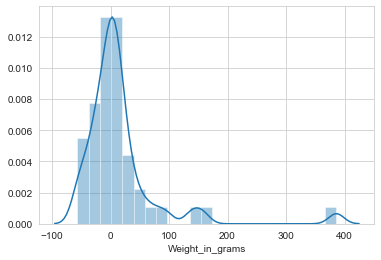

In [48]:
sns.distplot(y_test-predictions)

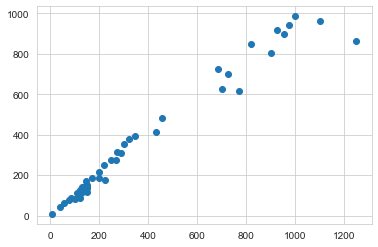

In [49]:
plt.scatter(y_test,predictions)

# Model Evaluation

The evaluation metrics for regression problems include :-

**1. Mean Absolute Error(MAE)** - It is the absolute value of the average of the errors.

**2. Mean Squared Error(MSE)** - It is another metric and is much more useful than the MAE as it punishes larger errors and is the average of the squared errors.

**3. Root Mean Squared Error(RMSE)** - This helps us to interpret the values obtained in the units that it is present in. It is the square root of the mean squared error.

All of these are **loss functions** and hence must be **minimized** as much as possible.

In [50]:
from sklearn import metrics

In [51]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 36.28049392129511
MSE: 5021.1433867741825
RMSE: 70.86002672010633


In [54]:
import pickle
file = open('fish_weight.pkl', 'wb')
pickle.dump(rf_random,file)

# Conclusion

We can see that the Random Forest Regressor Model does a good job in predicting the weight of the fish and hence the model can be used to predict the weight of a new fish when it is caught.